In [154]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon

In [155]:
df_2015_q2 = pd.read_csv('../Data/TripData/trip_data_2015Q2.csv')
stations_centract_df = pd.read_csv('../Data/stations_census_tracts.csv')

In [156]:
df_2015_q2.columns

Index(['Trip id', 'Starttime', 'Stoptime', 'Bikeid', 'Tripduration',
       'From station id', 'From station name', 'To station id',
       'To station name', 'Usertype'],
      dtype='object')

In [157]:
df_2015_q2 = df_2015_q2.rename(columns={'Trip id': 'Tripid', 'From station id': 'From_station_id',
                                       'From station name': 'From_station_name', 'To station id': 
                                       'To_station_id', 'To station name': 'To_station_name'})
df_2015_q2.head(1)

,Tripid,Starttime,Stoptime,Bikeid,Tripduration,From_station_id,From_station_name,To_station_id,To_station_name,Usertype
0,10676972,5/31/2015 6:54,5/31/2015 10:17,70166,12190,1018,Butler St & Stanton Ave,1001,Forbes Ave & Market Square,Customer


In [158]:
stations_centract_df.columns

Index(['Station #', 'Station_Name', 'NumRacks', 'Latitude', 'Longitude',
       'coordinates', 'tractce10'],
      dtype='object')

In [159]:
stations_centract_df.loc[0]['tractce10'].dtype

dtype('int64')

In [160]:
stations_centract_df = stations_centract_df.rename(columns={'Station #': 'station_id'})
stations_centract_df.head(2)

,station_id,Station_Name,NumRacks,Latitude,Longitude,coordinates,tractce10
0,1000,Liberty Ave & Stanwix St,16,40.441326,-80.004679,POINT (-80.00467900000001 40.441326),20100
1,1001,Forbes Ave & Market Square,19,40.440877,-80.003080,POINT (-80.00308000000001 40.440877),20100


In [161]:
type(stations_centract_df.loc[0]['tractce10'])

numpy.int64

In [162]:
stations_centract_df["tractce10"]= stations_centract_df["tractce10"].astype(str)

In [163]:
for i in range(len(stations_centract_df)):
    if len(stations_centract_df.loc[i]['tractce10']) == 5:
        stations_centract_df.at[i, 'tractce10'] = '0' + stations_centract_df.loc[i]['tractce10']

stations_centract_df

,station_id,Station_Name,NumRacks,Latitude,Longitude,coordinates,tractce10
0,1000,Liberty Ave & Stanwix St,16,40.441326,-80.004679,POINT (-80.00467900000001 40.441326),020100
1,1001,Forbes Ave & Market Square,19,40.440877,-80.003080,POINT (-80.00308000000001 40.440877),020100
2,1002,Third Ave & Wood St,15,40.439030,-80.001860,POINT (-80.00185999999999 40.43903),020100
3,1003,First Ave & Smithfield St (Art Institute),15,40.437200,-80.000375,POINT (-80.00037500000001 40.4372),020100
4,1004,First Ave & B St (T Station),15,40.435887,-79.997102,POINT (-79.997102 40.435887),020100
...,...,...,...,...,...,...,...
95,49781,Fifth Ave & Miltenberger,6,40.438296,-79.981177,POINT (-79.98117685 40.43829598),010300
96,49801,Microsoft,6,40.453797,-79.990940,POINT (-79.99094009 40.45379691),240600
97,49881,Arch St & Jacksonia St,5,40.457773,-80.009458,POINT (-80.00945806999999 40.45777261),250300
98,49921,W General Robinson St & Chuck Noll Way,5,40.447412,-80.012065,POINT (-80.01206517 40.44741245),981200


In [164]:
df_2015_q2.insert(7, "from_census_tract", "0")

In [165]:
df_2015_q2.insert(10, "to_census_tract", "0")
df_2015_q2.head(1)

,Tripid,Starttime,Stoptime,Bikeid,Tripduration,From_station_id,From_station_name,from_census_tract,To_station_id,To_station_name,to_census_tract,Usertype
0,10676972,5/31/2015 6:54,5/31/2015 10:17,70166,12190,1018,Butler St & Stanton Ave,0,1001,Forbes Ave & Market Square,0,Customer


In [166]:
#get the 2010 census tract neighborhoods in Pittsburgh
cenTract = gpd.read_file('../Data/2010_Census_Tracts/a36fc9b1-4e53-4fd1-80fb-db1554e213422020328-1-nbfxcj.l6b8.shp')


#find the centroids of each neighborhood for labeling
cenTract["center"] = cenTract["geometry"].centroid
map_points = cenTract.copy()
map_points.set_geometry("center", inplace = True)

centract_dict = dict(zip(stations_centract_df.station_id, stations_centract_df.tractce10))   

/Users/katelyncmorrison/opt/anaconda3/envs/fair_demand_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [167]:
centract_dict.get(49951)
#return the census tract
#parameter is the station id

'060300'

In [168]:
for i in range(len(df_2015_q2)):
    from_station = df_2015_q2.loc[i]['From_station_id']
    
    if from_station == 1050:
        df_2015_q2.at[i, 'from_census_tract'] = "0"
    else:
        df_2015_q2.at[i, 'from_census_tract'] = centract_dict.get(from_station)
    
    to_station = df_2015_q2.loc[i]['To_station_id']
    
    if to_station == 1050:
        df_2015_q2.at[i, 'to_census_tract'] = "0"
    else:
        df_2015_q2.at[i, 'to_census_tract'] = centract_dict.get(to_station)

df_2015_q2.to_csv('../Data/TripData/trip_data_2015Q2_ct.csv')

In [169]:
# df_2015_q2 = pd.read_csv('../Data/TripData/trip_data_2015Q2_ct.csv')
for i in range(len(df_2015_q2)):
    if pd.isna(df_2015_q2.loc[i]['to_census_tract']):
        df_2015_q2.at[i, 'to_census_tract'] = "0"
        
    if pd.isna(df_2015_q2.loc[i]['from_census_tract']):
        df_2015_q2.at[i, 'from_census_tract'] = "0"    

In [170]:
# df_2015_q2 = df_2015_q2.reset_index()

In [171]:
df_2015_q2

,Tripid,Starttime,Stoptime,Bikeid,Tripduration,From_station_id,From_station_name,from_census_tract,To_station_id,To_station_name,to_census_tract,Usertype
0,10676972,5/31/2015 6:54,5/31/2015 10:17,70166,12190,1018,Butler St & Stanton Ave,981000,1001,Forbes Ave & Market Square,020100,Customer
1,10677086,5/31/2015 6:57,5/31/2015 9:24,70368,8842,1018,Butler St & Stanton Ave,981000,1018,Butler St & Stanton Ave,981000,Subscriber
2,10677131,5/31/2015 6:58,5/31/2015 10:09,70354,11448,1019,42nd St & Butler St,090100,1019,42nd St & Butler St,090100,Subscriber
3,10677525,5/31/2015 7:08,5/31/2015 7:15,70232,452,1001,Forbes Ave & Market Square,020100,1001,Forbes Ave & Market Square,020100,Subscriber
4,10677886,5/31/2015 7:15,5/31/2015 9:27,70468,7866,1018,Butler St & Stanton Ave,981000,1018,Butler St & Stanton Ave,981000,Subscriber
...,...,...,...,...,...,...,...,...,...,...,...,...
9193,11714255,6/30/2015 22:43,6/30/2015 22:45,70175,103,1012,North Shore Trail & Fort Duquesne Bridge,981200,1012,North Shore Trail & Fort Duquesne Bridge,981200,Customer
9194,11714259,6/30/2015 22:44,6/30/2015 22:51,70038,417,1012,North Shore Trail & Fort Duquesne Bridge,981200,1001,Forbes Ave & Market Square,020100,Customer
9195,11714328,6/30/2015 23:16,6/30/2015 23:50,70363,2043,1014,Ridge Ave & Brighton Rd (CCAC),562700,1015,Federal St & E North Ave,562700,Customer
9196,11714401,6/30/2015 23:35,6/30/2015 23:53,70477,1061,1036,Schenley Dr at Schenley Plaza (Carnegie Librar...,982200,1039,Atwood St & Bates St,040600,Subscriber


In [172]:
inflow = centract_dict.copy()
inflow = {value:0 for key, value in inflow.items()}
outflow = inflow.copy()

inflow['0'] = 0
outflow['0'] = 0

for i in range(len(df_2015_q2)):
#     if df_2015_q2.loc[i]['to_census_tract'] is not '0':
#     print("census tract " + df_2015_q2.loc[i]['to_census_tract'])
#     print("inflow amt " + str(inflow[df_2015_q2.loc[i]['to_census_tract']]))
    inflow[df_2015_q2.loc[i]['to_census_tract']] += 1
    outflow[df_2015_q2.loc[i]['from_census_tract']] += 1
#     print("inflow amt " + str(inflow[df_2015_q2.loc[i]['to_census_tract']]))

for i in range(len(cenTract)):
    if cenTract.loc[i]['tractce10'] not in inflow.keys():
        inflow[cenTract.loc[i]['tractce10']] = 0
        
    if cenTract.loc[i]['tractce10'] not in outflow.keys():
        outflow[cenTract.loc[i]['tractce10']] = 0

In [176]:
inflow_df = pd.DataFrame.from_dict(inflow, orient='index', columns=['inflow_count'])
inflow_df = inflow_df.reset_index()
inflow_df = inflow_df.rename(columns = {'index': 'tractce10'})


outflow_df = pd.DataFrame.from_dict(outflow, orient='index', columns=['outflow_count'])
outflow_df = outflow_df.reset_index()
outflow_df = outflow_df.rename(columns = {'index': 'tractce10'})

In [177]:
inflow_df

,tractce10,inflow_count
0,020100,3002
1,010300,153
2,020300,937
3,981200,274
4,563200,437
...,...,...
134,270100,0
135,980900,0
136,250700,0
137,270400,0


In [178]:
outflow_df

,tractce10,outflow_count
0,020100,3016
1,010300,170
2,020300,998
3,981200,241
4,563200,436
...,...,...
134,270100,0
135,980900,0
136,250700,0
137,270400,0


In [188]:
#prep two merge the geodataframe and the dataframe together
pdf = cenTract.merge(inflow_df, on='tractce10')
pdf = pdf.merge(outflow_df, on='tractce10')

for i in range(len(pdf)):
    if pd.isna(pdf.loc[i]['inflow_count']):
        pdf.at[i, 'inflow_count'] = 0   
    if pd.isna(pdf.loc[i]['outflow_count']):
        pdf.at[i, 'outflow_count'] = 0   

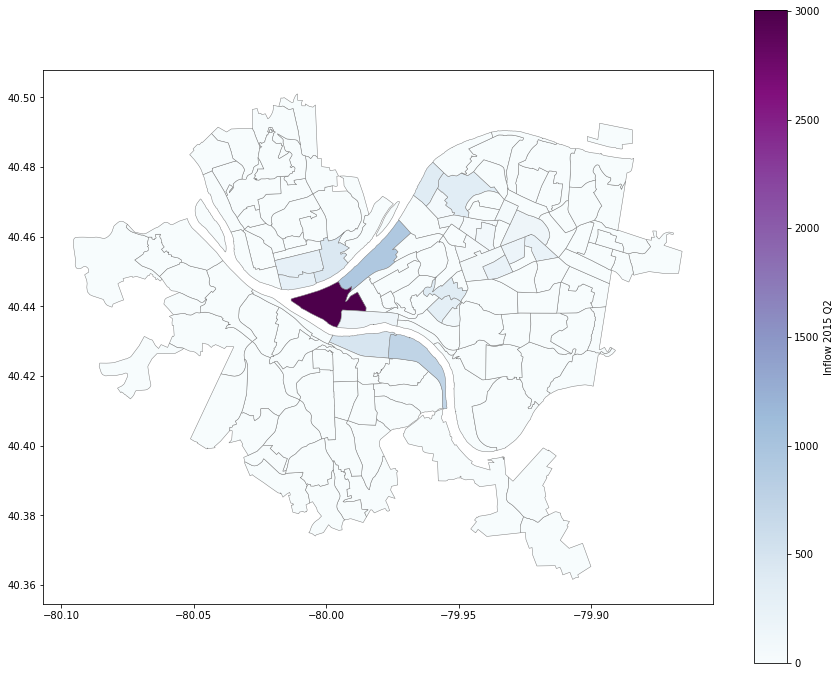

In [189]:
#plot the neighborhood ids on the map
ax = pdf.plot(column="inflow_count", cmap='BuPu', figsize = (15, 12), edgecolor = "grey", 
              linewidth = 0.5, legend = True, legend_kwds={'label': "Inflow 2015 Q2",'orientation': "vertical"})
# texts = []

# for x, y, label in zip(map_points.geometry.x, map_points.geometry.y, pdf['inflow_count']):
#     texts.append(plt.text(x, y, label, fontsize = 8))

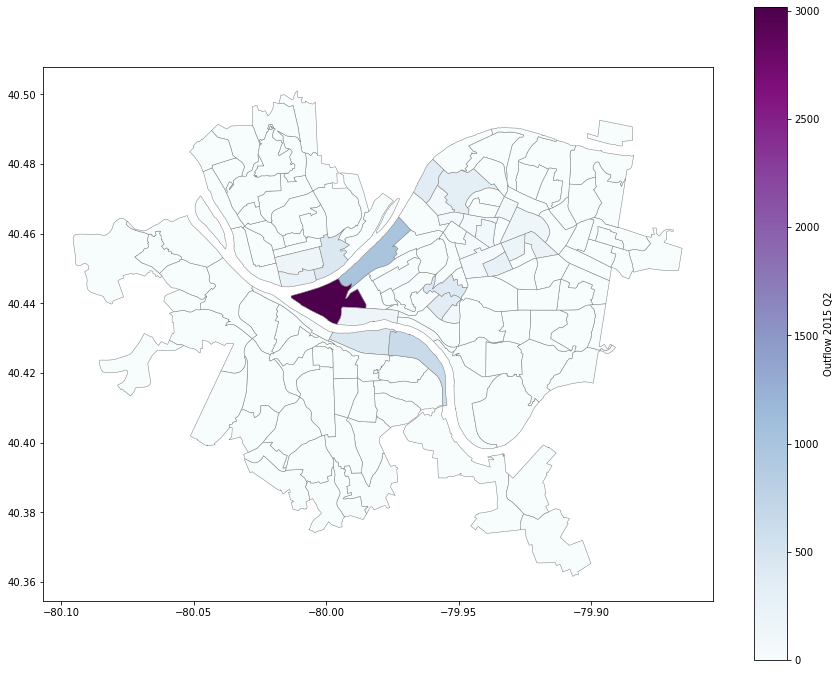

In [190]:
#plot the neighborhood ids on the map
ax = pdf.plot(column="outflow_count", cmap='BuPu', figsize = (15, 12), edgecolor = "grey", 
              linewidth = 0.5, legend = True, legend_kwds={'label': "Outflow 2015 Q2",'orientation': "vertical"})